# 5 Numerical integration, differentiation, ODEs

## Integrate using a library

We have already performed a simple integration using the Monte Carlo Method and the [Riemann sum](https://en.wikipedia.org/wiki/Riemann_sum) in Lab.4a. Now, let's 

Find the integral 
$$
F(x) = \int_{x'=0}^{x'=x} x'^2 dx'
$$
The analytical solution $F(10)$ is obviously 

In [1]:
F_10 = (1./3)*10**3 
print(F_10)

333.3333333333333


In [5]:
%pylab inline

#%pylab nbagg
#%pylab ipympl

Populating the interactive namespace from numpy and matplotlib


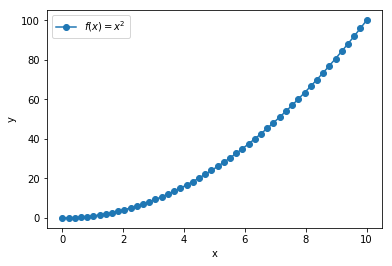

In [6]:
ifig=1; close(ifig); figure(ifig)
def func1(x):
    return x**2
x=linspace(0,10)
y=func1(x)
plot(x,y,'o-',label='$f(x) = x^2$')
xlabel('x'),ylabel('y');legend()

In [7]:
from scipy import integrate
#integrate.cumtrapz?

In [8]:
F=integrate.cumtrapz(y,x)
#print (len(x),len(F))

In [9]:
F

array([4.24992988e-03, 2.54995793e-02, 8.07486676e-02, 1.86996915e-01,
       3.61244039e-01, 6.20489762e-01, 9.81733801e-01, 1.46197588e+00,
       2.07821571e+00, 2.84745302e+00, 3.78668752e+00, 4.91291894e+00,
       6.24314699e+00, 7.79437139e+00, 9.58359187e+00, 1.16278081e+01,
       1.39440199e+01, 1.65492269e+01, 1.94604289e+01, 2.26946255e+01,
       2.62688166e+01, 3.02000017e+01, 3.45051807e+01, 3.92013532e+01,
       4.43055190e+01, 4.98346777e+01, 5.58058292e+01, 6.22359731e+01,
       6.91421092e+01, 7.65412371e+01, 8.44503566e+01, 9.28864674e+01,
       1.01866569e+02, 1.11407662e+02, 1.21526745e+02, 1.32240818e+02,
       1.43566881e+02, 1.55521934e+02, 1.68122976e+02, 1.81387007e+02,
       1.95331027e+02, 2.09972035e+02, 2.25327032e+02, 2.41413017e+02,
       2.58246989e+02, 2.75845949e+02, 2.94226895e+02, 3.13406829e+02,
       3.33402749e+02])

The integral with the scipy.integrate.cumtrapz method is: 333.4


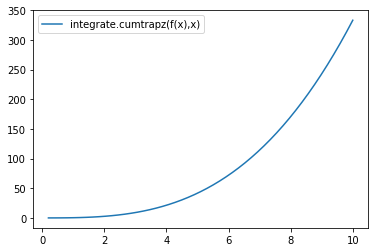

In [10]:
plot(x[1:],F, label="integrate.cumtrapz(f(x),x)")
legend()
print("The integral with the scipy.integrate.cumtrapz method is: %5.1f" % F[-1])

## Numerical derivatives 

In this section we will learn how we can calculate a derivative numerically. The fundamental idea involves replacing differentials with differences. An important aspect is to think about the types of errors that emerge when doing that, especially we have to introduce the important concepts of rounding error and truncation errors.

**Literature:** Numerical Recipies, Ch. 5.7

## Difference equations
Function
$$ y = f(x) $$ for example $$y = x^2$$ for $x \in [1,5]$.

In [11]:
x=linspace(5,25,25)

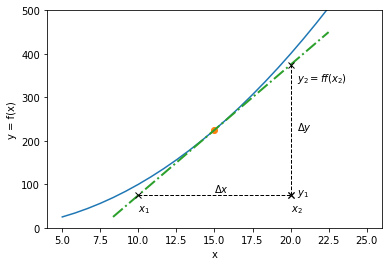

In [12]:
figure(1)
xl =  4; xr = 22
f = lambda x: x**2    # function
x0 = 15               # take derivative at x0
ff = lambda x: 2*x0*x + f(x0) -2*x0**2   # derivative
close(1);figure(1)
plot(x,f(x)); xlabel('x'), ylabel('y = f(x)'); ylim(0,500)
if True:
    plot(x0,f(x0),'o')
    plot(x[4:22],ff(x[4:22]),'-.',lw=2)
if True:
    x1=x[6];x2=x[18]
    plot([x1,x2],[ff(x1),ff(x1)],'k--x',lw=1)
    plot([x2,x2],[ff(x1),ff(x2)],'k--x',lw=1)
    text(0.5*(x2+x1),1.1*ff(x1),'$ \Delta x$')
    text(1.02*x2,0.5*(ff(x1)+ff(x2)),'$ \Delta y$')
    text(x1,0.5*ff(x1),'$x_1$')
    text(x2,0.5*ff(x1),'$x_2$')
    text(1.02*x2,ff(x1),'$y_1$')
    text(1.02*x2,0.9*ff(x2),'$y_2 = ff(x_2)$')

### Slope
$$
\frac{dy}{dx}  \approx \frac{\Delta y}{\Delta x} = 
\frac{y_2 - y_1}{x_2 - x_1}
$$

## Derivative 
The derivative $\frac{df}{dx}$ of a function $y=f(x)$ can be approximated by the difference equation 
$$ f'(x) \approx \frac{f(x+h) -f(x)}{h}.$$

Why? Rearrange the Taylor expansion of $f(x)$
$$
f(x+h) = f(x) + hf^\prime(x) + \frac{1}{2}h^2f^{\prime\prime}(x)
 + \frac{1}{6}h^3f^{\prime\prime\prime}(x) + \dots
$$
to solve for $f^\prime(x)$ and discard order two and higher terms
$$
\frac{1}{2}h^2f^{\prime\prime}(x)
 + \frac{1}{6}h^3f^{\prime\prime\prime}(x) + \dots
$$

In [13]:
def deriv1(f,x,h):
    dfdx = (f(x+h) - f(x)) / h
    return dfdx

In [14]:
deriv1(f,1,1.e-1) -2.

0.10000000000000187

Note that the answer is not exactly `2.00000000` as we know the answer to be from the analytical approach. But smaller values of `h` give a better answer? _Right?_ well, let's see .... let's analyse the error in a bit more detail. The higher order terms that we discarded represent the truncation error. They represent the difference between the solution of the difference equation and the exact mathematical equation, no matter how _precisely_ the difference equation is solved. The truncation error limits the _accuracy_ of the method. Note the difference between _precision_ and _accuracy_ introducecd here!

We can improve the accuracy by taking smaller $h$ for calculating the derivative. Can't we make the answer then arbitrarily exact? Let's try ...

## Errors
There are two basic sources of error! They have to do with accuracy and with precision.

**Accuracy:** How well does the discretized equation represent the original mathematical equation?
This is the truncation error. 

**Precision:** How well is the solution satisfying the discretized equation? This is limited by the roundoff error.

### Convergence test
In order to determine the accuracy of our solution scheme we study the behaviour of a particular solution scheme under grid (time and/or space) refinement. In our case this means we do a series of runs with decreasing `h`.

We use a convenient technique for _vectorizing_ a function which allows to evaluate an arbitrary function for a _parameter vector_. This way of doing it will not help performance. See an example below of how to do true multi-tasking.

In [15]:
# in order to vectorize wrap the function to isolate the 
# variable over which we should loop turn a scalar function 
# into a vectorized function
def hdev(h):
    return deriv1(f,1.,h)
vhdev = vectorize(hdev)
h_pow = range(0,-14,-1)

In [16]:
h_pow

range(0, -14, -1)

In [17]:
h = 10**array(h_pow, dtype=float)

In [18]:
vhdev(1.e-8)

array(1.99999999)

In [19]:
log10(vhdev(1.e-8)-2.0)

C:\Users\koen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


nan

C:\Users\koen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


((0, -14), Text(0, 0.5, 'log10 (df/dx - 2.0)'), Text(0.5, 0, 'log h'))

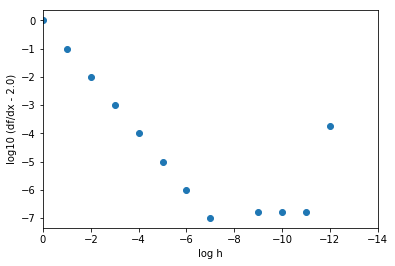

In [20]:
close(2);figure(2)
plot(h_pow, log10(vhdev(h)-2.0),'o')
xlim(0,-14), ylabel('log10 (df/dx - 2.0)'), xlabel('log h')

#### Bottom line
You can reduce the truncation error by taking a smaller interval `h`. However, as you try minimizing the truncation error you will see that there is a limit. At too small `h` the `deriv1` function will try to perform the difference `(f(x+h) - f(x))` with too few or no significant digits and the roundoff error will become larger, and eventually dominate the result. 


## Ordinary differential equations

Differential equations are often hard to solve on paper but in many cases become trivial on a computer. 

### Euler step
Take the simplest, first order ODE
$$
y^\prime = f(y,x)
$$
where the right-hand side (RHS) is the function $f(y,x)$ that specifies the derivative $y^\prime = \frac{dy}{dx}$. We are looking for the function $y(x)$, but here not the algebraic expression but the numerical values. For a time dependent problem $x = t$. 

Take for example $f (y,x) = 2x$, then we know that $y(x) = x^2$. Therefore 
the differential equation is

$$\frac{dy}{dx} = 2x $$ 

Let's pretend we do not know the answer, but the initial conditions $y(0) = 0$. How can we numerically calculate $y(x)$ for a series of discrete values $x_i$?


#### Discretization

We need to turn the ODE into a difference equation:

$$\frac{y_\mathrm{n+1} - y_\mathrm{n}}{x_\mathrm{n+1} - x_\mathrm{n}} = f(y_\mathrm{n},x_\mathrm{n}) $$

which we solve for $y_\mathrm{n+1}$:

$$y_\mathrm{n+1} = y_\mathrm{n} +  h f(y_\mathrm{n},x_\mathrm{n})$$ where $h= x_\mathrm{n+1} - x_\mathrm{n}$

Specifically then for our case the first few steps look like this:

$$
 \frac{y_2 - y_1}{h} = f(y_1,x_1) \\
 y_2  = y_1 + h 2 x_1
$$

This is the **explicit** discretization, or the **Euler** step, the right-hand side is evaluated for the known values $(y_\mathrm{n},x_\mathrm{n})$.

Therefore, we evaluate $f(x,y)$ at a sequence of chosen points `x = [x[1],x[2],x[3],...,x[n]]` and start according to $ y(0) = 0 $   with `y[1] = 0` and then proceed to 
```python
y[2]  = y[1] + h*2*x[1]
y[3]  = y[2] + h*2*x[2]
...
y[n]  = y[n-1] + h*2*x[n-1]
```

Let's implement this:

In [24]:
#%pylab ipympl

In [25]:
y=[]; y.append(0)
x=[]; x.append(0)

rhs_f = lambda x: 2*x
x_thing = x[0]; y_thing = y[0]
dx=0.1; x_end = 4.
while x_thing <= x_end+dx:
    y_thing = y_thing + dx * rhs_f(x_thing)
    x_thing += dx
    #print(x_thing,y_thing)
    x.append(x_thing); y.append(y_thing)

(Text(0.5, 0, '$x$'), Text(0, 0.5, '$y(x)$'))

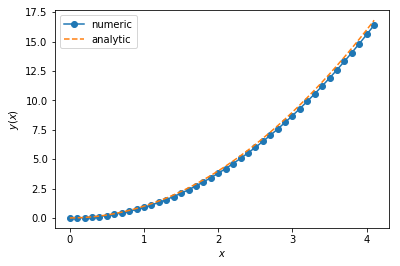

In [26]:
close(4);figure(4)
plot(x,y,'o-',label='numeric')
plot(x,array(x)**2,'--',label='analytic')
legend();xlabel('$x$'),ylabel('$y(x)$')

The numerical answer does not agree very well with the analytic answer. By now you are familiar with the question: How can the accuracy be improved?